# Thompson Sampling

## Importing the libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [14]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [18]:
import random  # Import the random module for generating random numbers

N = 10000  # Number of iterations/rounds
d = 10  # Number of different ads/options

ads_selected = []  # List to store the index of the selected ad in each iteration

# Lists to keep track of the number of rewards for each ad
numbers_of_rewards_1 = [0] * d  
numbers_of_rewards_0 = [0] * d  

total_reward = 0  # Total accumulated reward

# Loop for each iteration/round
for n in range(0, 10):

    ad = 0  # Index of the selected ad
    max_random = 0  # Maximum random value

    # Loop through each ad to select the best one based on exploration and exploitation
    for i in range(0, d):
        
        # Generate a random value using the beta distribution
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        # Check if the generated random value is greater than the current maximum
        if random_beta > max_random:
            max_random = random_beta
            ad = i  # Update the selected ad index

    ads_selected.append(ad)  # Store the selected ad index for this iteration

    reward = dataset.values[n, ad]  # Get the reward of the selected ad

    # Update the counts of rewards for the selected ad
    if reward == 1:
        numbers_of_rewards_1[ad] += 1
    else:
        numbers_of_rewards_0[ad] += 1

    total_reward += reward  # Update the total accumulated reward


## Visualising the results - Histogram

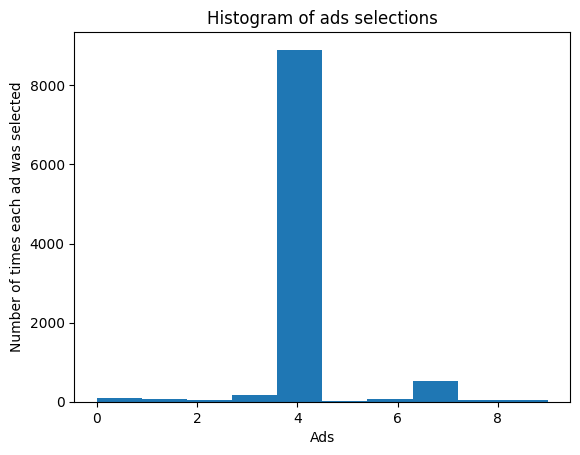

In [16]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()